# Seasonality and Trend Analysis, Volatility Analysis


In this section, we will analyze seasonality and trends, and perform a volatility analysis for each asset.
This involves:
1. **Seasonality and Trend Analysis**: Using time series decomposition to separate data into trend, seasonal, and residual components.
2. **Volatility Analysis**: Calculating rolling volatility (using rolling standard deviation) to capture fluctuations in each asset's risk.

We will use the adjusted closing prices for Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY).


In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fetching historical data for each asset
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

# Downloading the data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Display the first few rows
data.head()


[*********************100%***********************]  3 of 3 completed


Ticker,BND,SPY,TSLA
Date,,,
2015-01-02 00:00:00+00:00,63.358768,173.173798,14.620667
2015-01-05 00:00:00+00:00,63.542770,170.046310,14.006000
2015-01-06 00:00:00+00:00,63.726673,168.444641,14.085333
2015-01-07 00:00:00+00:00,63.765068,170.543655,14.063333
2015-01-08 00:00:00+00:00,63.665386,173.569946,14.041333


### Seasonality and Trend Analysis: Time Series Decomposition

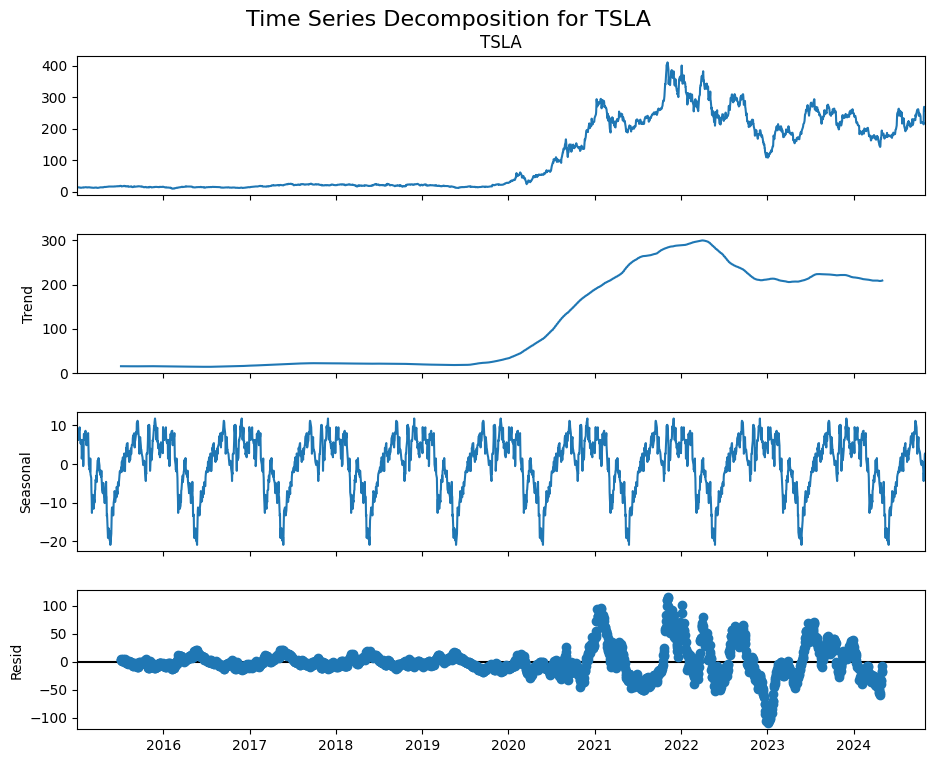

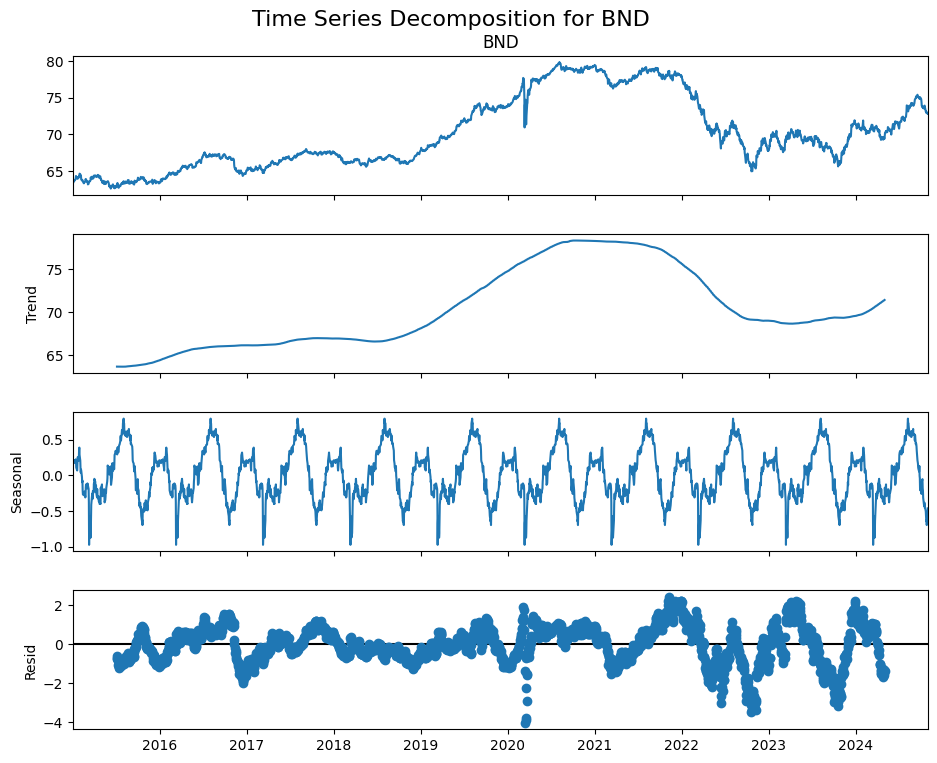

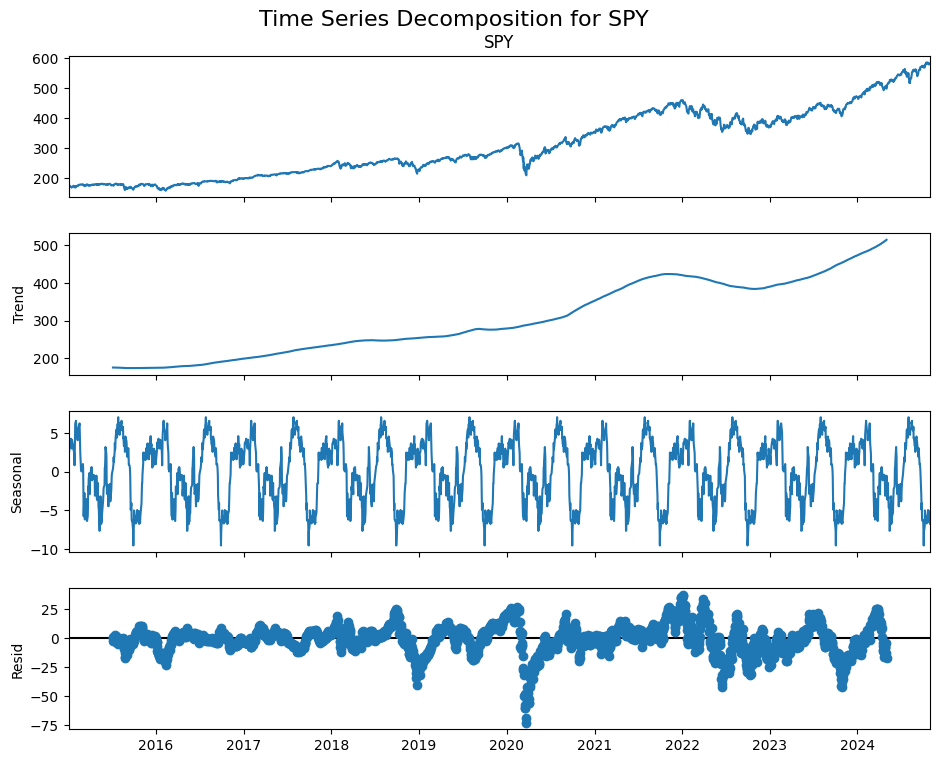

In [2]:

# Performing time series decomposition for each asset
decomposition_results = {}

for ticker in tickers:
    # Decompose with an additive model (suitable for non-stationary data with trends)
    decomposition = sm.tsa.seasonal_decompose(data[ticker].dropna(), model='additive', period=252)
    decomposition_results[ticker] = decomposition
    
    # Plotting the decomposed components
    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    fig.suptitle(f'Time Series Decomposition for {ticker}', fontsize=16)
    plt.show()


### Volatility Analysis

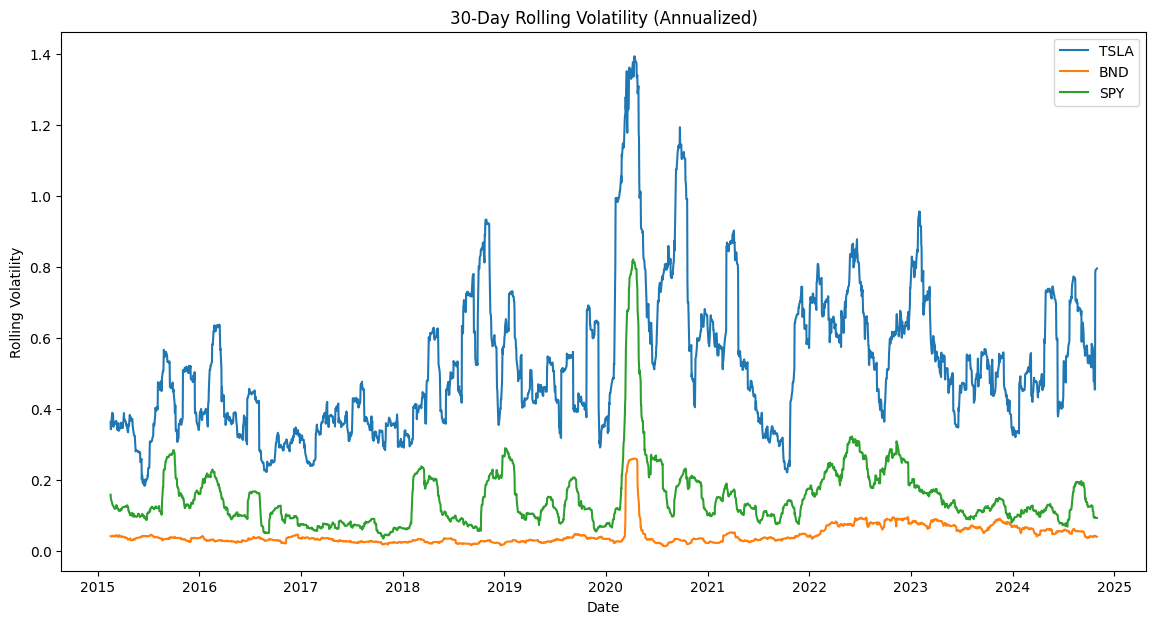

In [5]:

# Define rolling window size for volatility
window_size = 30  # 30-day rolling window

# Calculate rolling standard deviation to measure volatility
rolling_volatility = data.pct_change().rolling(window=window_size).std() * np.sqrt(252)  # Annualize by sqrt(252)

# Plot rolling volatility for each asset
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_volatility[ticker], label=ticker)

plt.title(f'{window_size}-Day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.legend()
plt.show()



In this notebook, we have:
- Decomposed each asset's time series data into trend, seasonal, and residual components.
- Calculated rolling volatility using a 30-day window, which is annualized to reflect each asset's risk over time.

This concludes the seasonality, trend analysis, and volatility analysis section.
